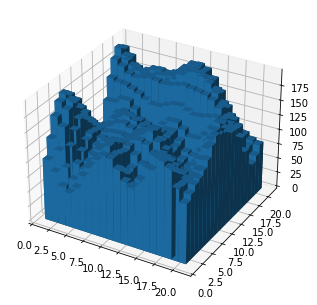

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D

Img_path = 'trxy_s2_00.tif'
Img_gray = cv2.imread(Img_path, cv2.IMREAD_GRAYSCALE)

subset_size = 20
step = 10
cropped_Img = Img_gray[step:subset_size + step, step:subset_size + step]

x, y = np.arange(1,subset_size+1,1), np.arange(1,subset_size+1,1)
xx,yy=np.meshgrid(x,y)
x, y = xx.ravel(), yy.ravel()
bottom=np.zeros_like(x)
grayvalue=cropped_Img.ravel()
width = height = 1
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.bar3d(x, y, bottom, width, height, grayvalue, shade=True)
plt.show()



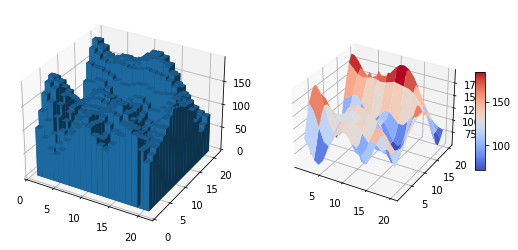

In [30]:
# 将bar chart 换成surface 图像
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

Img_path = 'trxy_s2_00.tif'
Img_gray = cv2.imread(Img_path, cv2.IMREAD_GRAYSCALE)

subset_size = 20
step = 10
cropped_Img = Img_gray[step:subset_size + step, step:subset_size + step]
grayvalue=cropped_Img.ravel()
x, y = np.arange(1,subset_size+1,1), np.arange(1,subset_size+1,1)
xx,yy=np.meshgrid(x,y)
x, y = xx.ravel(), yy.ravel()
bottom=np.zeros_like(x)
width = height = 1

fig = plt.figure(figsize=(9, 6))

ax_1=plt.subplot(1, 2, 1,projection = '3d')
ax_1.bar3d(x, y, bottom, width, height, grayvalue, shade=True)

ax_2=plt.subplot(1, 2, 2,projection = '3d')
surf = ax_2.plot_surface(xx, yy, cropped_Img, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
plt.colorbar(surf, shrink=0.3, aspect=10)

plt.show()




Cubic splie 插值
分段插值： 把区间[a,b] 分成 n 个区间，共有 n+1 个点， 其中两个端点 $x_0 = a, x_n = b$。 三次样条就是说每个小区间的曲线是一个三次方程，三次样条方程满足以下条件：
1. 在每个分段小区间[$x_i,x_{i+1}$]上，$S(x)=S_i(x)$都是一个三次方程
2. 满足插值条件，即$S(x_{i})=y_i(i=0,1,...,n)$
3. 曲线光滑，即$S_(x), S'(x),S''(x)$连续
则这个三次方程可以构造成如下形式：
$y=a_i+b_ix+c_ix^2+d_ix^3$这种形式，我们称这个方程为三次样条函数$S_i(x)$
